In [570]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
import random
from random import randint

In [571]:
def visualize(images):
    plt.figure(figsize=(20, 20))
    for i in xrange(len(images)):
        plt.subplot(1, len(images), i + 1)
        io.imshow(images[i])
    plt.show()

In [572]:
def download_and_split(fname, parts=3):
    image = io.imread(fname).astype('float64')
    image /= 256.0
    height = (image.shape[0] // parts) * parts
    return np.split(image[:height], parts)
    # images = []
    # for part in xrange(parts):
    #     images.append(image[(height * part) / parts : (height * (part + 1)) / parts])
    # return images    

In [573]:
def cut_image(image):
    # h = image.shape[0]
    # w = image.shape[1]
    cut_h, cut_w = image.shape[0] // 20, image.shape[0] // 20
    return image[cut_h:-cut_h, cut_w:-cut_w]
    # return image[int(0.07 * h) : int(0.93 * h), int(0.07 * w) : int(0.93 * w)]

In [574]:
def star_dist(img1, img2):
    star =  np.sum(img1 * img2) / (np.sqrt(np.sum(img1 * img1) * np.sum(img2 * img2)))
    # print(star)
    return star

In [575]:
def get_star_shift(img, far_img):
    DELTA_H = 15
    DELTA_W = 15
    dists = {}
    
    for del_h in xrange(2 * DELTA_H):
        for del_w in xrange(2 * DELTA_W):
            
            dists[(del_h, del_w)] = star_dist(img,
                    far_img[
                        del_h:del_h + img.shape[0],
                        del_w:del_w + img.shape[1]])
    
    best_dist = dists[(0, 0)]
    best_h, best_w = 0, 0
    
    for del_h in xrange(2 * DELTA_H):
        for del_w in xrange(2 * DELTA_W):
            if dists[(del_h, del_w)] > best_dist:
                best_dist = dists[(del_h, del_w)]
                best_h, best_w = del_h, del_w
  
    return far_img[best_h:best_h + img.shape[0], best_w:best_w + img.shape[1]]

In [576]:
def get_mse_shift(img, far_img):
    DELTA_H = 15
    DELTA_W = 15 

    dists = {}
    for del_h in xrange(2 * DELTA_H):
        for del_w in xrange(2 * DELTA_W):
            
            dists[(del_h, del_w)] = mse(img,
                    far_img[
                        del_h:del_h + img.shape[0],
                        del_w:del_w + img.shape[1]])
    
    best_dist = dists[(0, 0)]
    best_h, best_w = 0, 0

    for del_h in xrange(2 * DELTA_H):
        for del_w in xrange(2 * DELTA_W):
            if dists[(del_h, del_w)] < best_dist:
                best_dist = dists[(del_h, del_w)]
                best_h, best_w = del_h, del_w
    
    return far_img[best_h:best_h + img.shape[0], best_w:best_w + img.shape[1]]

In [577]:
def shift_images(images):
    DELTA_H = 15
    DELTA_W = 15
    normalized_mse_images = []
    normalized_star_images = []
    normalized_mse_images.append(images[0][DELTA_H:-DELTA_H, DELTA_W:-DELTA_W])
    normalized_star_images.append(images[0][DELTA_H:-DELTA_H, DELTA_W:-DELTA_W])
    for i in xrange(1, len(images)):
        normalized_star_images.append(get_star_shift(normalized_star_images[0], images[i]))
        normalized_mse_images.append(get_mse_shift(normalized_mse_images[0], images[i]))
    return normalized_mse_images, normalized_star_images
   

In [578]:
def concat_images(images):
    for i in xrange(len(images)):
        h = images[i].shape[0]
        w = images[i].shape[1]
        images[i] = np.array(images[i]).reshape(h, w, 1)
        
    return np.concatenate(images[::-1], axis=2)

In [579]:
def align(fname):
    sub_images = download_and_split(fname, 3)
    sub_images = [cut_image(sub_img) for sub_img in sub_images]
    sub_images = np.copy(sub_images)
    shifted_mse_images, shifted_star_images = shift_images(sub_images)
    visualize([
            concat_images(shifted_mse_images),  
            concat_images(shifted_star_images)
        ])

In [580]:
HOME = '/home/aliakseisemchankau/Yandex/CV/materials/1laba/01-channel-align-pub'

In [581]:
small_pics = [
    '/small/00348a.png',
    '/small/00458a.png',
    '/small/01043a.png',
    '/small/01047a.png',
    '/small/01069a.png',
    '/small/01861a.png',
    '/small/01886a.png'
]

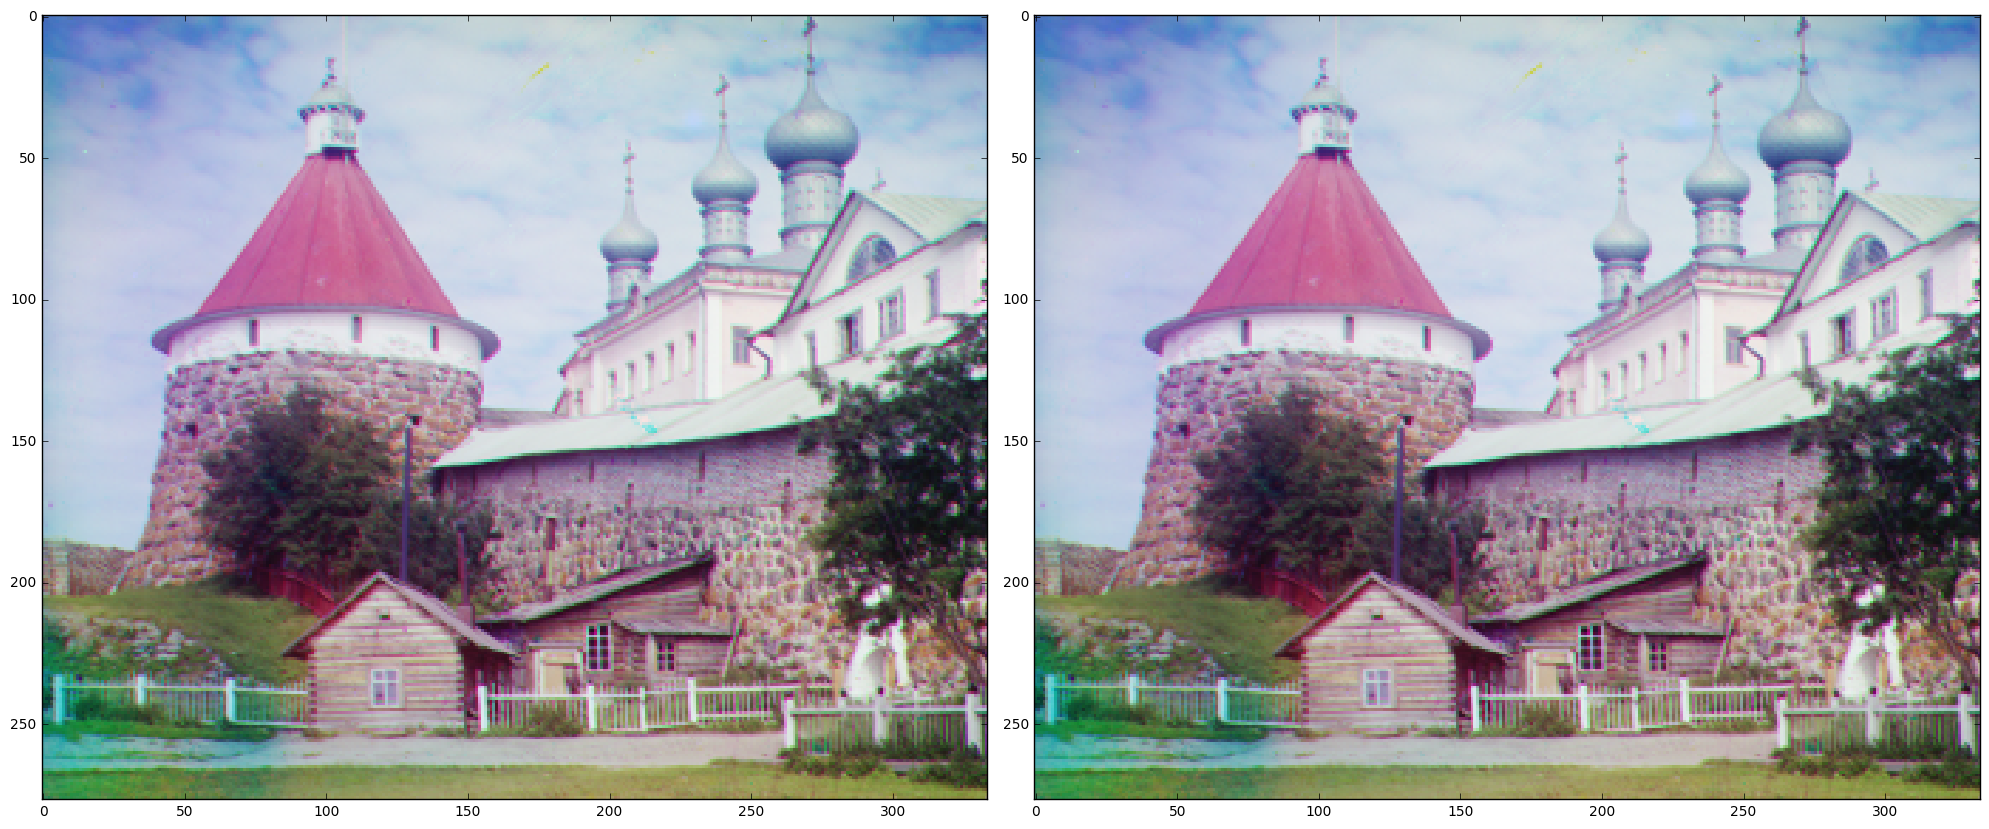

4.96937084198 seconds


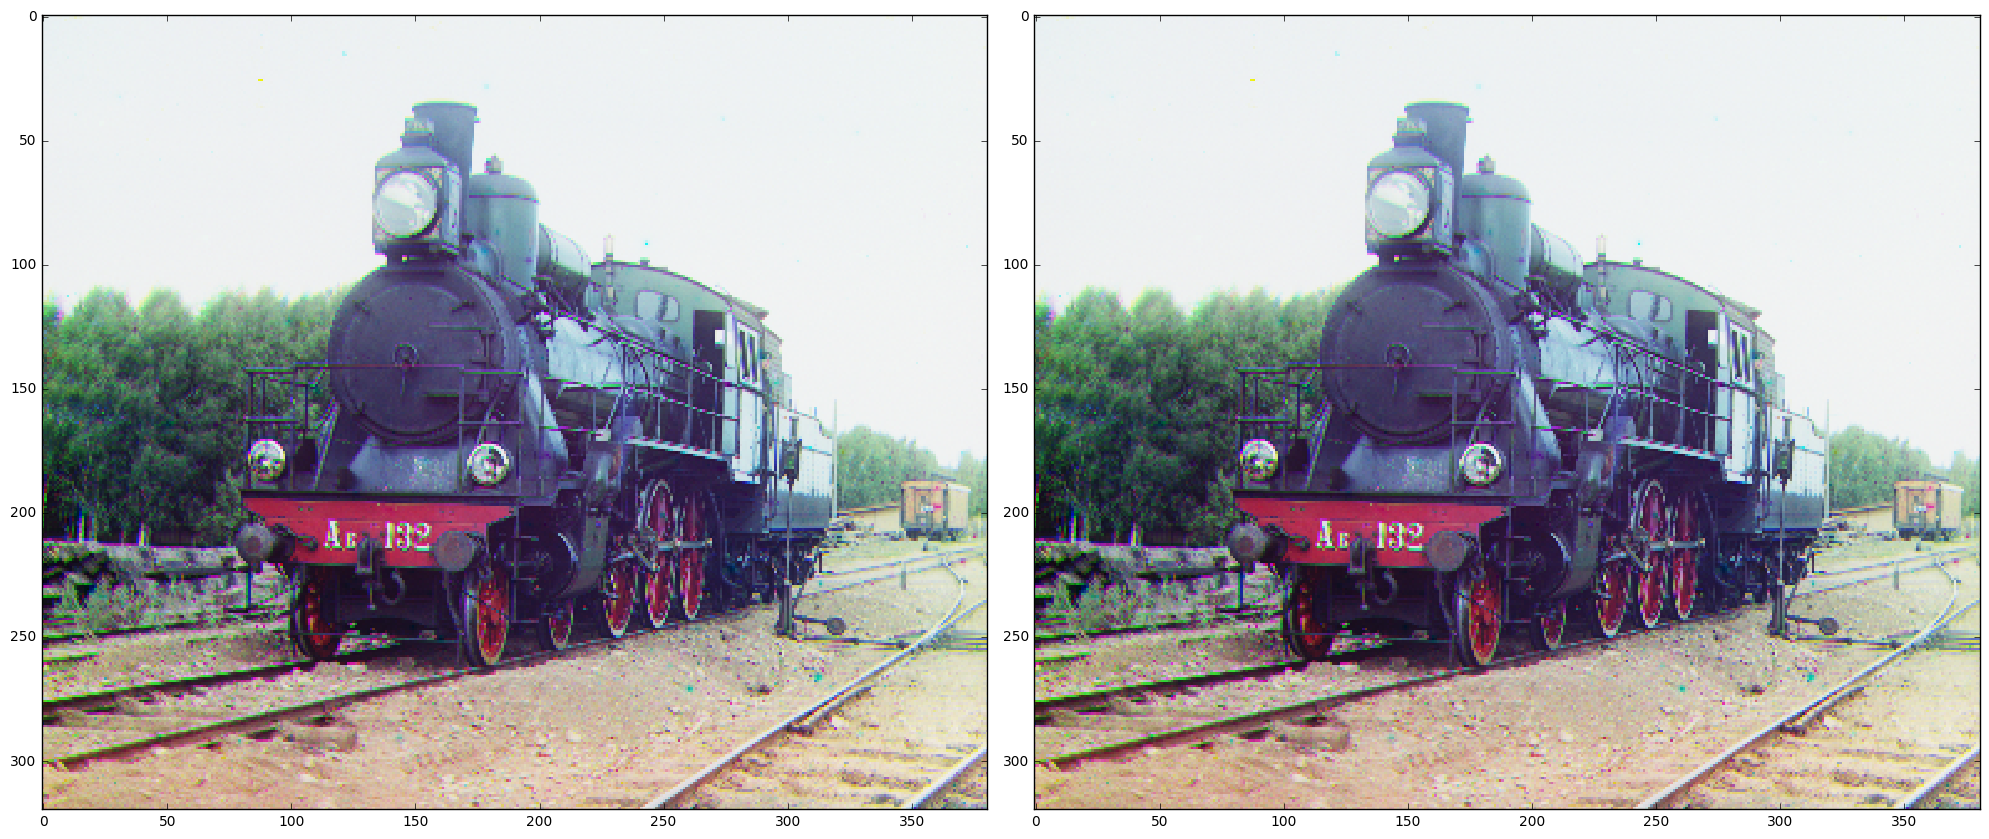

6.74205303192 seconds


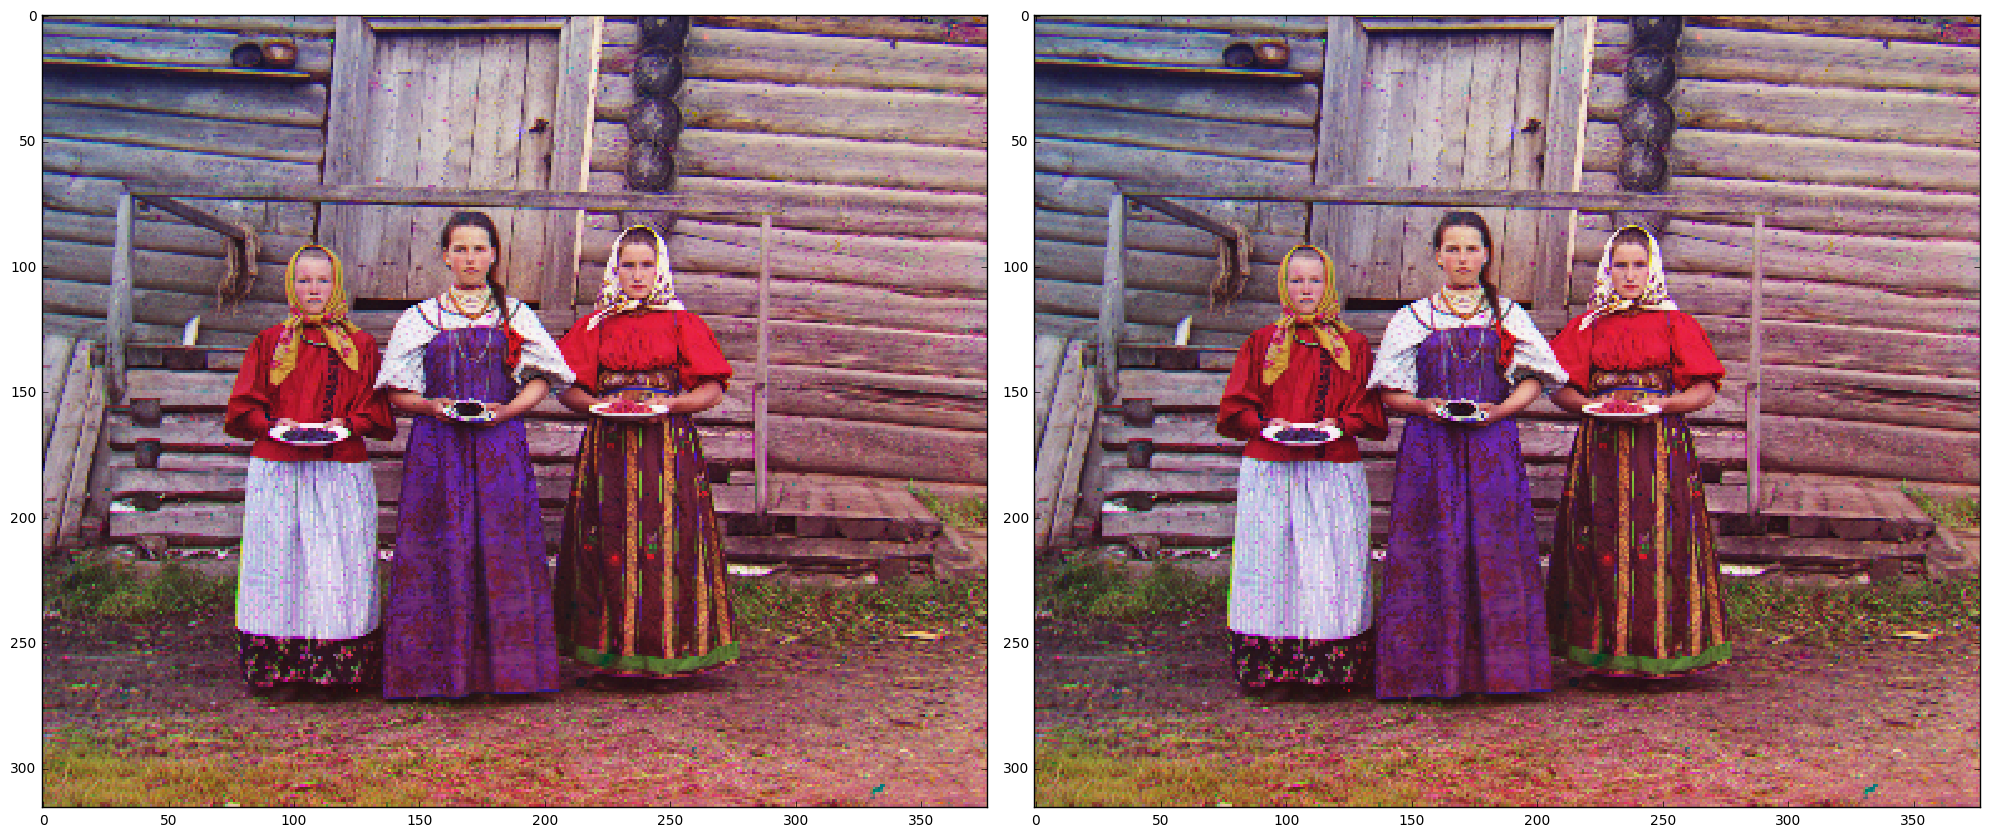

6.83357620239 seconds


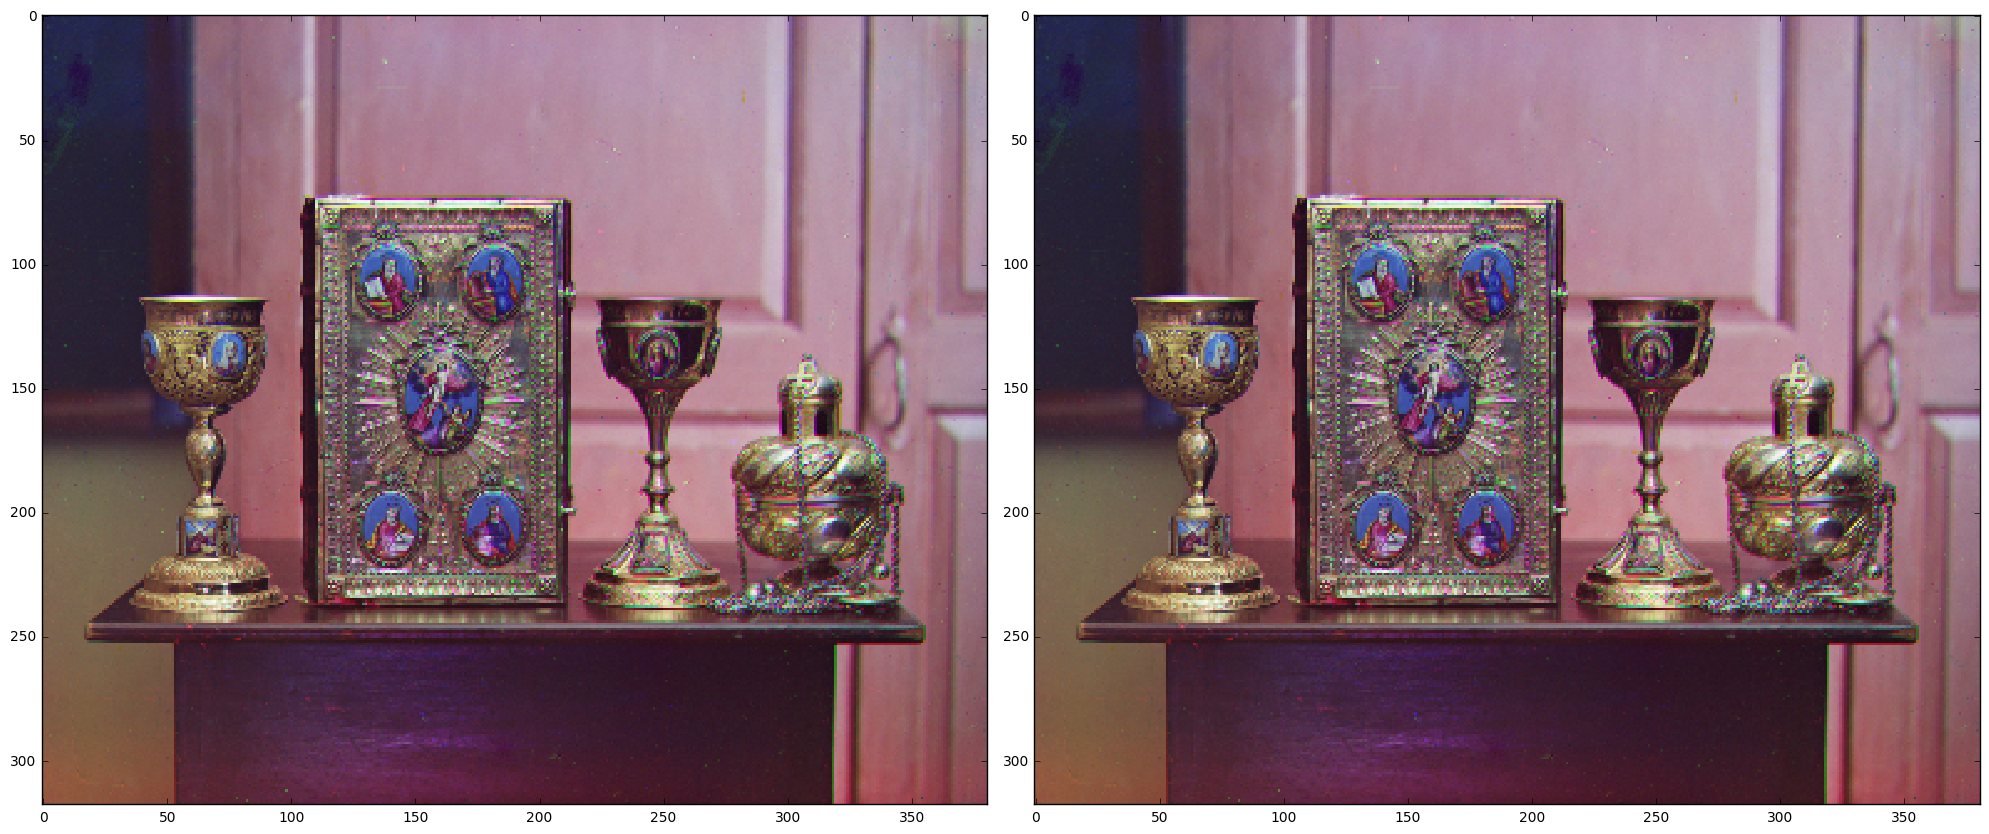

7.66482615471 seconds


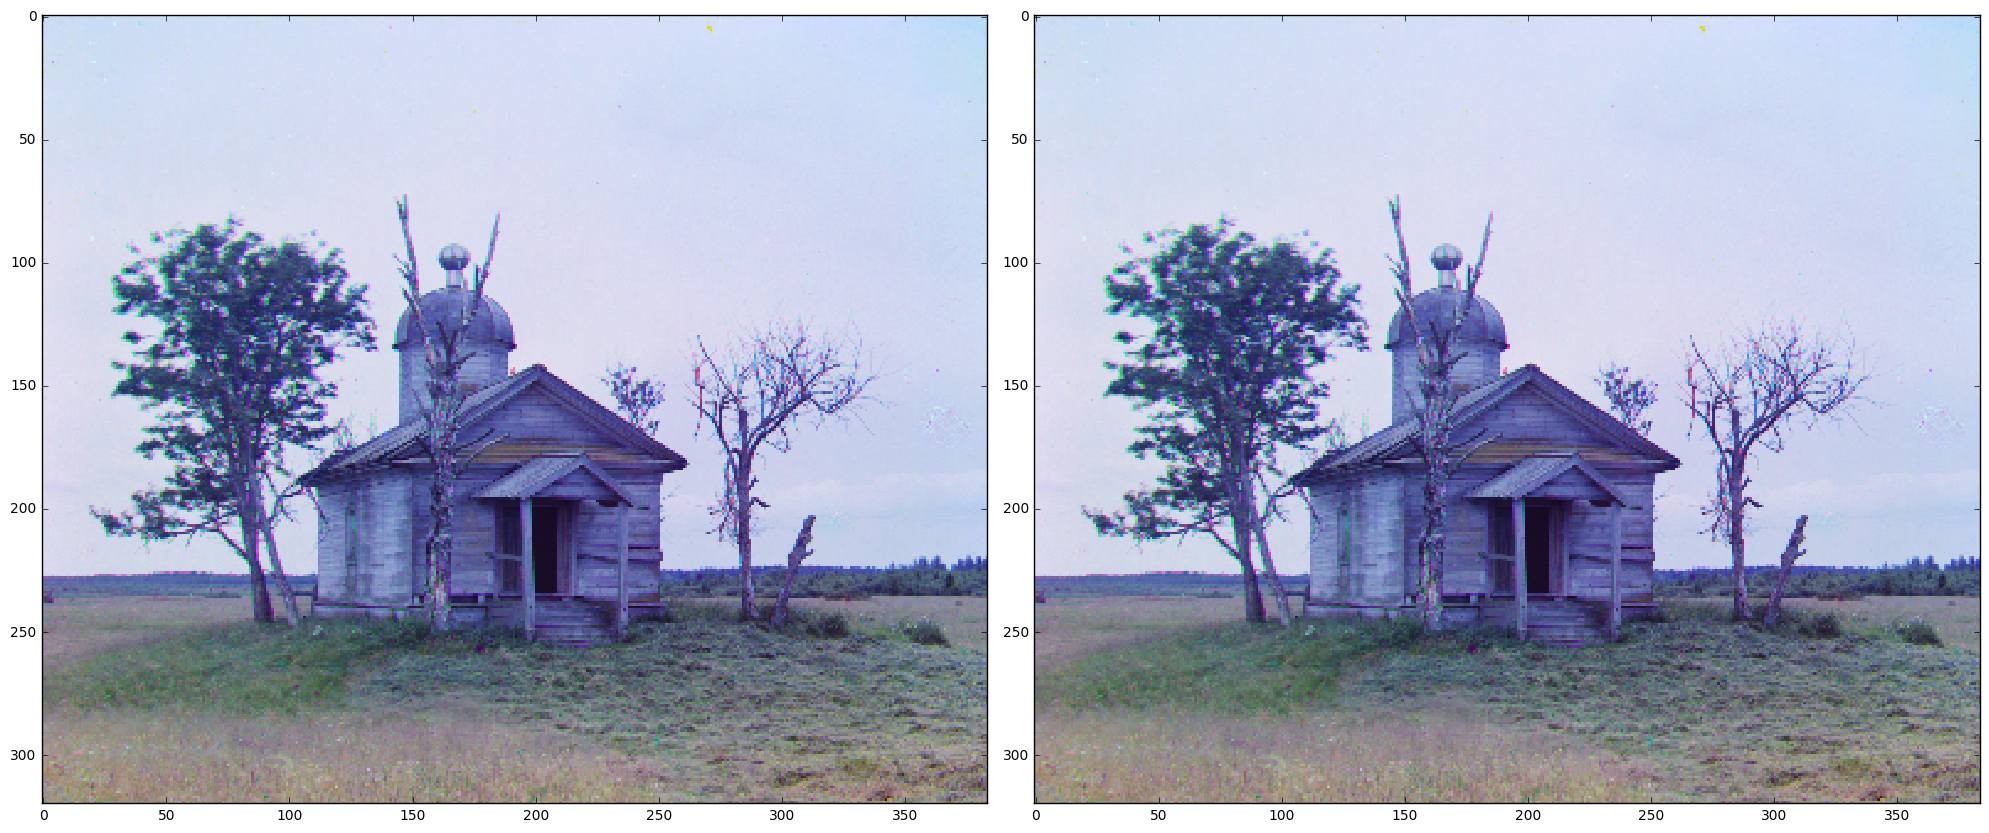

8.05751299858 seconds


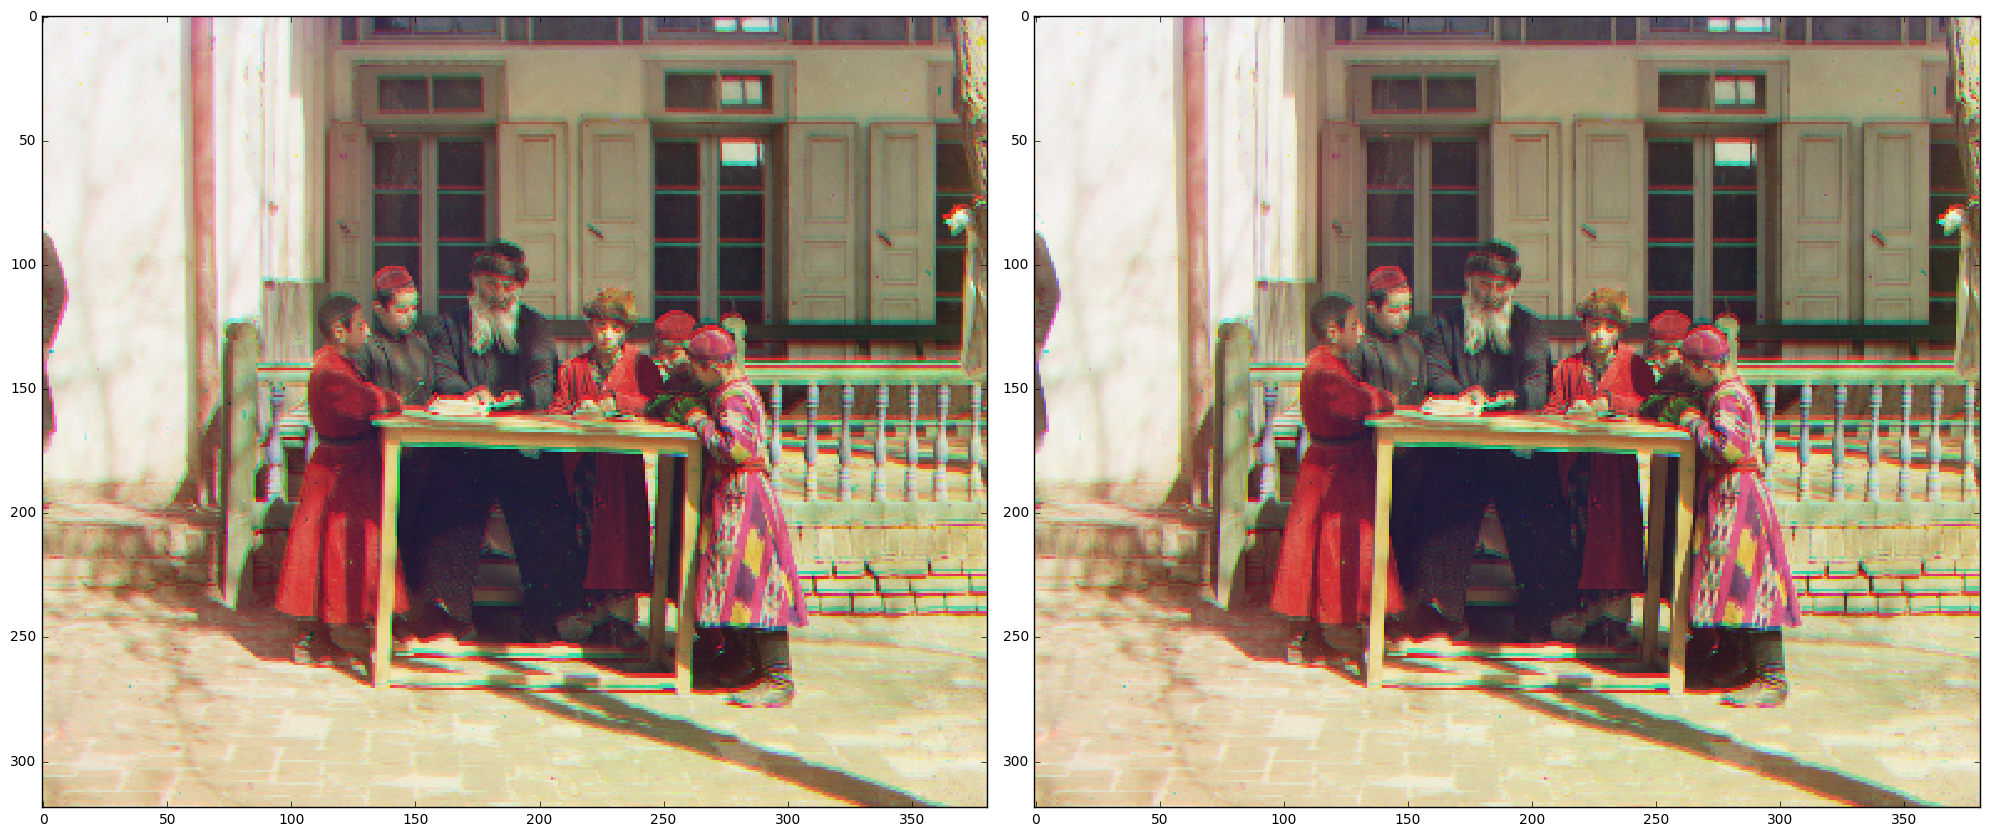

7.62069892883 seconds


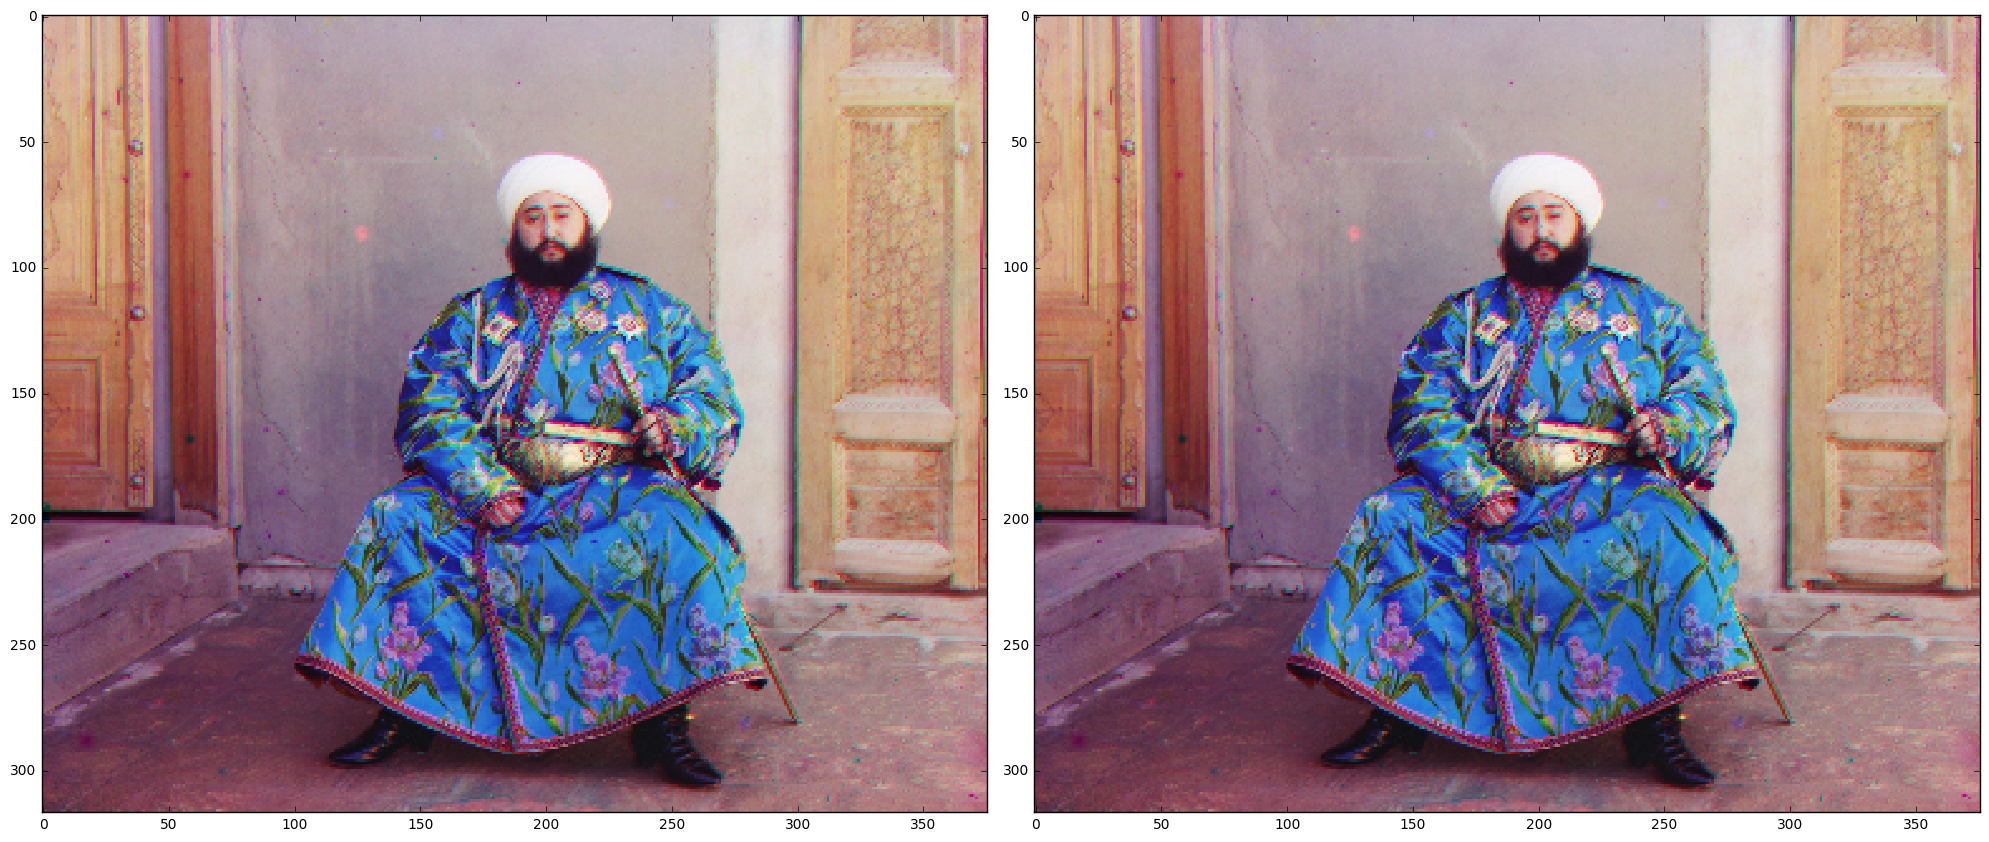

7.2335588932 seconds


In [582]:
from time import time

for pic in small_pics:
    t_start = time()
    align(HOME + pic)
    t_finish = time()
    print(str(t_finish - t_start) + ' seconds')